In [2]:
# import the required libraries
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin99\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [49]:
tweet_df = pd.read_csv('Train.csv')
test_df=pd.read_csv('Test.csv')

In [50]:
tweet_df.head()
test_df.head()

,id,tweet,label
0,2882,The cross-dressers and faggots are sure not hi...,NaN
1,3933,They ca n't stand toe to toe with the white ma...,NaN
2,304,There is an active community here - you just n...,NaN
3,3325,"Mate, have you been to Britain ?",NaN
4,2626,They are nothing less than indoctrination cent...,NaN


In [12]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7492 entries, 0 to 7491
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      7492 non-null   int64 
 1   tweet   7492 non-null   object
 2   label   7492 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 175.7+ KB


In [13]:
# printing random tweets 
print(tweet_df['tweet'].iloc[0],"\n")
print(tweet_df['tweet'].iloc[1],"\n")
print(tweet_df['tweet'].iloc[2],"\n")
print(tweet_df['tweet'].iloc[3],"\n")
print(tweet_df['tweet'].iloc[4],"\n")

Lunch was surreal . 

It offers certificates of completion for many courses . 

No amount of educational funds will drag the population out of it 's sludge . 

No, lets stay scattered across the earth and try to change every racially unaware white across the earth ... 

The two teenagers are charged with assaulting Rose Powell last Wednesday and stealing her car . 



In [14]:
#creating a function to process the data
def data_processing(tweet):
    tweet = tweet.lower()
    tweet = re.sub(r"https\S+|www\S+http\S+", '', tweet, flags = re.MULTILINE)
    tweet = re.sub(r'\@w+|\#','', tweet)
    tweet = re.sub(r'[^\w\s]','',tweet)
    tweet = re.sub(r'ð','',tweet)
    tweet_tokens = word_tokenize(tweet)
    filtered_tweets = [w for w in tweet_tokens if not w in stop_words]
    return " ".join(filtered_tweets)

In [16]:
nltk.download('punkt_tab')
tweet_df.tweet = tweet_df['tweet'].apply(data_processing)

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\admin99\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


In [17]:
tweet_df = tweet_df.drop_duplicates('tweet')

In [22]:
lemmatizer = WordNetLemmatizer()
def lemmatizing(data):
    tweet = [lemmatizer.lemmatize(word) for word in data]
    return data

In [24]:
nltk.download('wordnet')
tweet_df['tweet'] = tweet_df['tweet'].apply(lambda x: lemmatizing(x))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\admin99\AppData\Roaming\nltk_data...


In [23]:
# printing the data to see the effect of preprocessing
print(tweet_df['tweet'].iloc[0],"\n")
print(tweet_df['tweet'].iloc[1],"\n")
print(tweet_df['tweet'].iloc[2],"\n")
print(tweet_df['tweet'].iloc[3],"\n")
print(tweet_df['tweet'].iloc[4],"\n")

user father dysfunctional selfish drags kids dysfunction run 

user user thanks lyft credit cant use cause dont offer wheelchair vans pdx disapointed getthanked 

bihday majesty 

model love u take u time ur 

factsguide society motivation 



In [25]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7273 entries, 0 to 7491
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      7273 non-null   int64 
 1   tweet   7273 non-null   object
 2   label   7273 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 227.3+ KB


In [26]:
tweet_df['label'].value_counts()

0    6427
1     846
Name: label, dtype: int64

### Data visualization 

<Axes: xlabel='label', ylabel='count'>

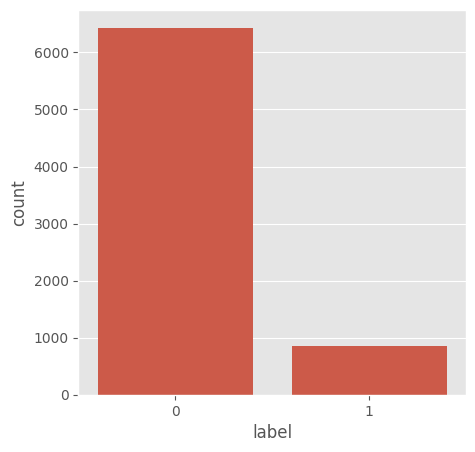

In [27]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='label', data = tweet_df)

Text(0.5, 1.0, 'Distribution of sentiments')

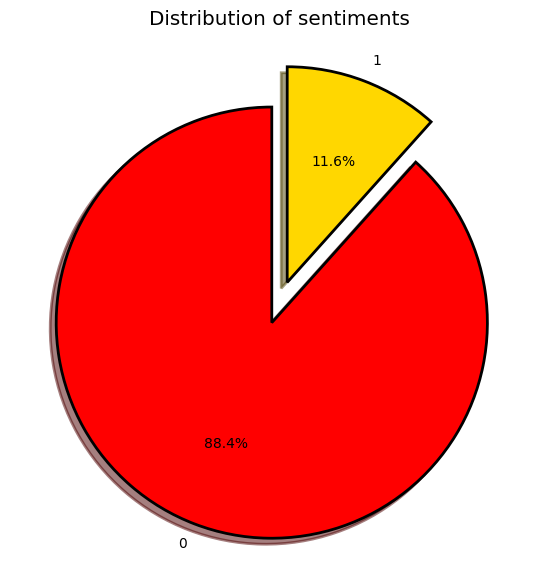

In [28]:
fig = plt.figure(figsize=(7,7))
colors = ("red", "gold")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = tweet_df['label'].value_counts()
explode = (0.1, 0.1)
tags.plot(kind='pie',autopct = '%1.1f%%', shadow=True, colors = colors, startangle =90, 
         wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')

In [29]:
non_hate_tweets = tweet_df[tweet_df.label == 0]
non_hate_tweets.head()

,id,tweet,label
0,1649,lunch surreal,0
1,4705,offers certificates completion many courses,0
2,3320,amount educational funds drag population sludge,0
3,6182,lets stay scattered across earth try change ev...,0
4,7594,two teenagers charged assaulting rose powell l...,0


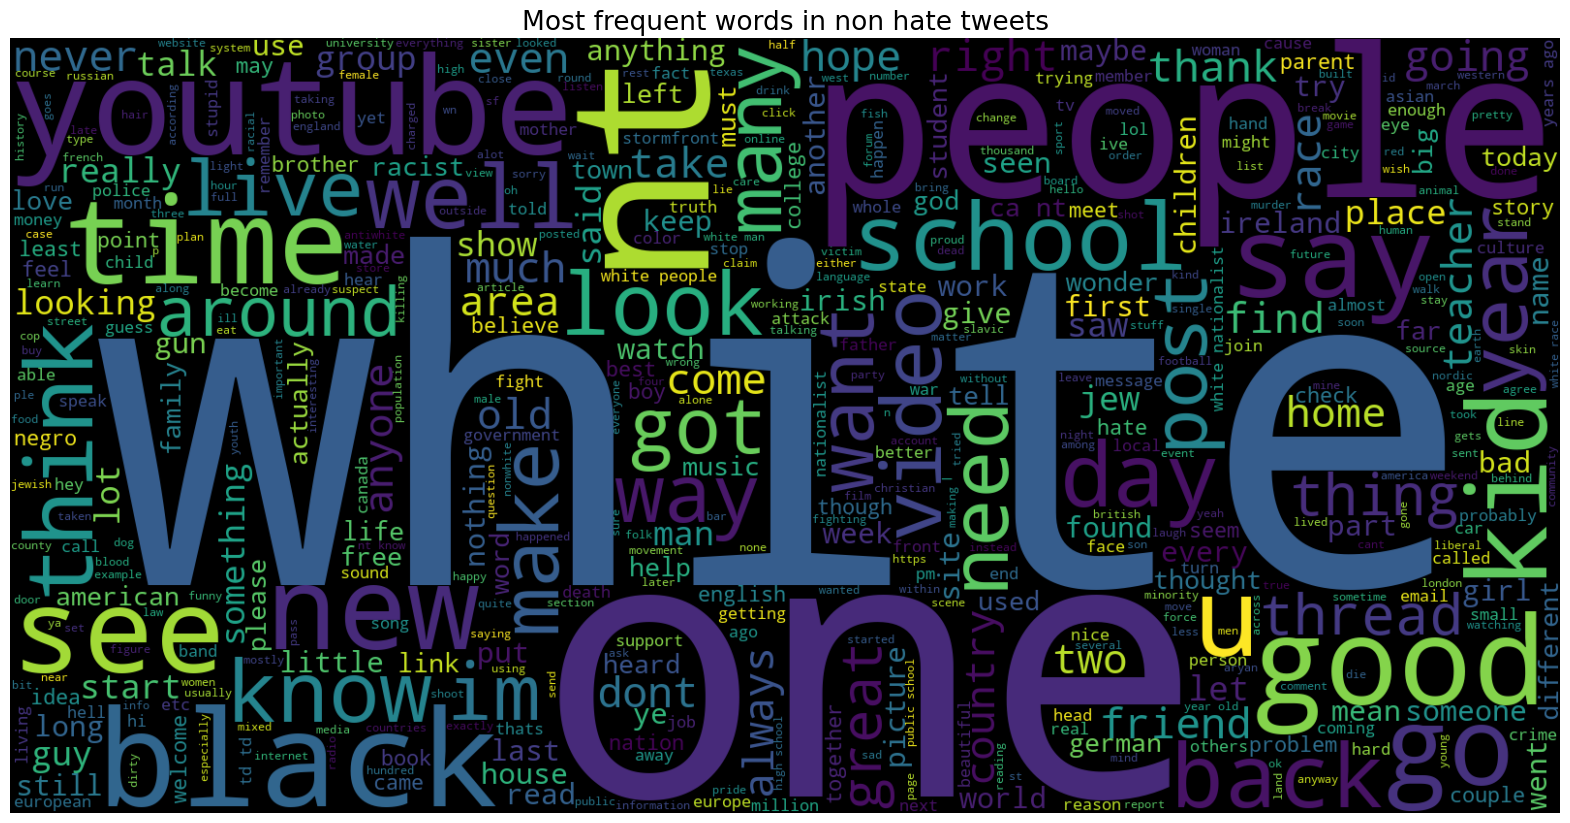

In [30]:
text = ' '.join([word for word in non_hate_tweets['tweet']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in non hate tweets', fontsize = 19)
plt.show()

In [31]:
neg_tweets = tweet_df[tweet_df.label == 1]
neg_tweets.head()

,id,tweet,label
11,8911,high time get back mother affika fix mess,1
13,8713,though problems one two groid infested elsewhe...,1
14,2373,think threat russians jews,1
48,5270,blacks hate whites,1
50,7307,unfortunately find difficult make living histo...,1


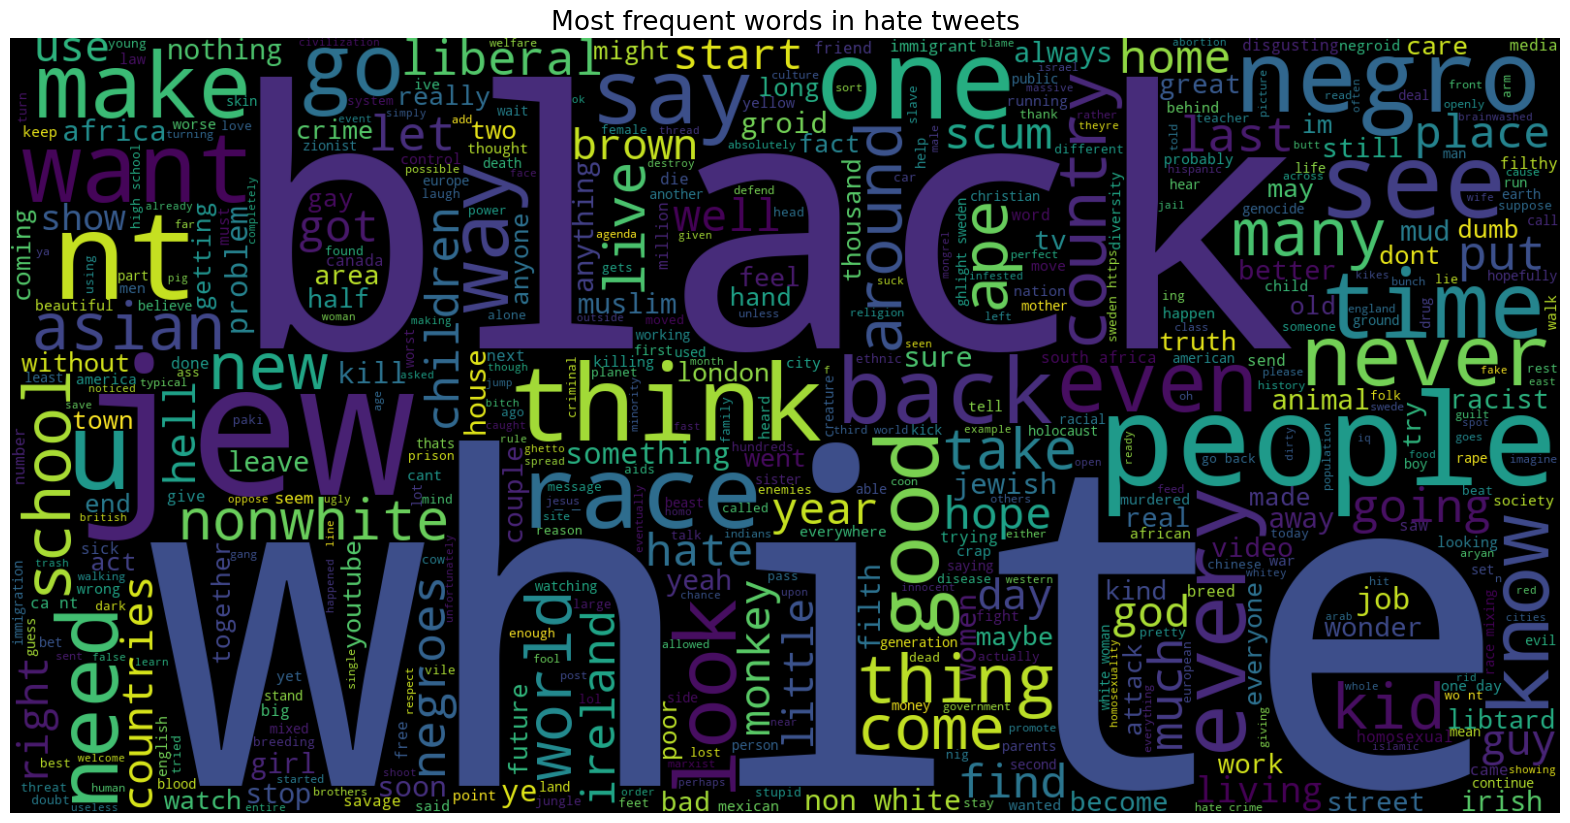

In [32]:
text = ' '.join([word for word in neg_tweets['tweet']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in hate tweets', fontsize = 19)
plt.show()

In [33]:
vect = TfidfVectorizer(ngram_range=(1,2)).fit(tweet_df['tweet'])

In [34]:
feature_names = vect.get_feature_names()
print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features: \n{}".format(feature_names[:20]))

Number of features: 62045

First 20 features: 
['00', '00 32', '00 48', '00 50', '00 anyone', '00 area', '00 bucks', '00 link', '000', '000 000', '000 97', '000 buck', '000 buckshot45lc', '000 euro', '000 standard', '000 vs', '0003', '00179', '00179 00333', '002']


c:\Users\admin99\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [35]:
vect = TfidfVectorizer(ngram_range=(1,3)).fit(tweet_df['tweet'])

In [36]:
feature_names = vect.get_feature_names()
print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features: \n{}".format(feature_names[:20]))

Number of features: 109701

First 20 features: 
['00', '00 32', '00 32 00', '00 48', '00 48 00', '00 50', '00 50 00', '00 anyone', '00 area', '00 bucks', '00 bucks gear', '00 link', '00 link discuss', '000', '000 000', '000 000 euro', '000 97', '000 97 white', '000 buck', '000 buck devestating']


## Model Building

In [54]:
X = tweet_df['tweet']
Y = tweet_df['label']
X = vect.transform(X)
smallx=test_df['tweet']
smallx=vect.transform(smallx)
smally=test_df['label']

In [38]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [59]:
print("Size of x_train:", (x_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of x_test: ", (x_test.shape))
print("Size of y_test: ", (y_test.shape))

Size of x_train: (5818, 109701)
Size of y_train: (5818,)
Size of x_test:  (1455, 109701)
Size of y_test:  (1455,)


In [60]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_predict = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_predict, y_test)
print("Test accuarcy: {:.2f}%".format(logreg_acc*100))

Test accuarcy: 86.87%


In [61]:
print(confusion_matrix(y_test, logreg_predict))
print("\n")
print(classification_report(y_test, logreg_predict))

[[1264    0]
 [ 191    0]]


              precision    recall  f1-score   support

           0       0.87      1.00      0.93      1264
           1       0.00      0.00      0.00       191

    accuracy                           0.87      1455
   macro avg       0.43      0.50      0.46      1455
weighted avg       0.75      0.87      0.81      1455



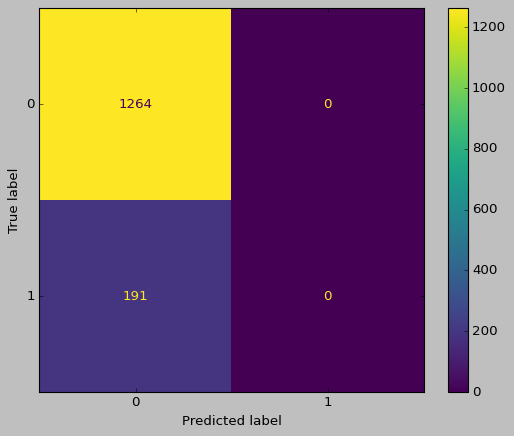

In [62]:
style.use('classic')
cm = confusion_matrix(y_test, logreg_predict, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot()

In [44]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [45]:
param_grid = {'C':[100, 10, 1.0, 0.1, 0.01], 'solver' :['newton-cg', 'lbfgs','liblinear']}
grid = GridSearchCV(LogisticRegression(), param_grid, cv = 5)
grid.fit(x_train, y_train)
print("Best Cross validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

Best Cross validation score: 0.89
Best parameters:  {'C': 1.0, 'solver': 'newton-cg'}


In [46]:
y_pred = grid.predict(x_test)

In [47]:
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 86.87%


In [48]:
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

[[1264    0]
 [ 191    0]]


              precision    recall  f1-score   support

           0       0.87      1.00      0.93      1264
           1       0.00      0.00      0.00       191

    accuracy                           0.87      1455
   macro avg       0.43      0.50      0.46      1455
weighted avg       0.75      0.87      0.81      1455

